# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FachryYusrie/Proyek-Machine-Learning-Heart-Disease-Analysis/refs/heads/main/Data/heart_disease.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
4,4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1013 non-null   int64  
 1   age       1013 non-null   int64  
 2   sex       1013 non-null   object 
 3   dataset   1013 non-null   object 
 4   cp        1013 non-null   object 
 5   trestbps  954 non-null    float64
 6   chol      983 non-null    float64
 7   fbs       923 non-null    object 
 8   restecg   1011 non-null   object 
 9   thalch    958 non-null    float64
 10  exang     958 non-null    object 
 11  oldpeak   951 non-null    float64
 12  slope     704 non-null    object 
 13  ca        402 non-null    float64
 14  thal      526 non-null    object 
dtypes: float64(5), int64(2), object(8)
memory usage: 118.8+ KB


In [4]:
df.describe(include='all')

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
count,1013.000000,1013.000000,1013,1013,1013,954.000000,983.000000,923,1011,958.000000,958,951.000000,704,402.000000,526
unique,NaN,NaN,2,4,4,NaN,NaN,2,3,NaN,2,NaN,3,NaN,3
top,NaN,NaN,Male,Cleveland,asymptomatic,NaN,NaN,False,normal,NaN,False,NaN,flat,NaN,normal
freq,NaN,NaN,792,304,537,NaN,NaN,773,592,NaN,593,NaN,382,NaN,249
mean,506.000000,53.609082,NaN,NaN,NaN,132.241090,203.680570,NaN,NaN,138.899791,NaN,0.915457,NaN,0.654229,NaN
std,292.572213,9.325535,NaN,NaN,NaN,18.763915,107.464263,NaN,NaN,25.773882,NaN,1.100767,NaN,0.927466,NaN
min,0.000000,28.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,60.000000,NaN,-2.600000,NaN,0.000000,NaN
25%,253.000000,47.000000,NaN,NaN,NaN,120.000000,181.500000,NaN,NaN,120.000000,NaN,0.000000,NaN,0.000000,NaN
50%,506.000000,54.000000,NaN,NaN,NaN,130.000000,226.000000,NaN,NaN,140.000000,NaN,0.600000,NaN,0.000000,NaN
75%,759.000000,60.000000,NaN,NaN,NaN,140.000000,269.000000,NaN,NaN,159.750000,NaN,1.600000,NaN,1.000000,NaN


In [5]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


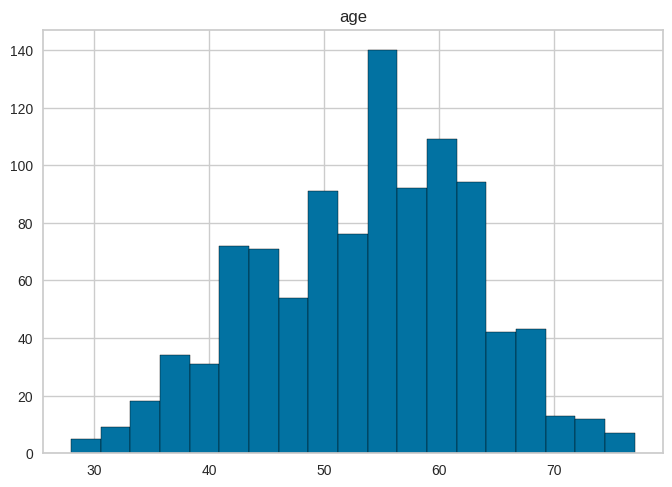

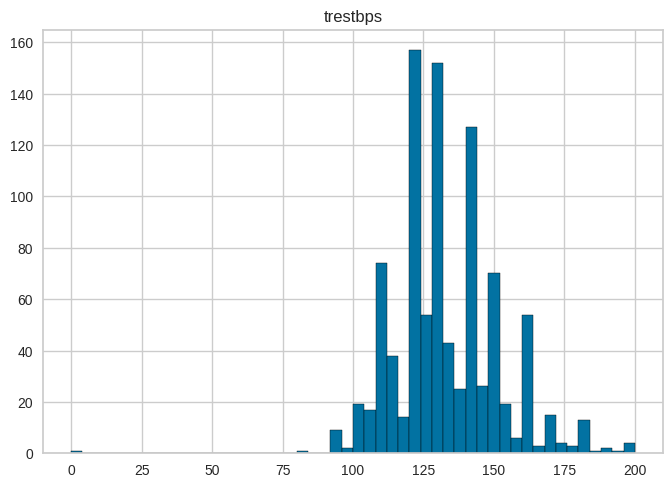

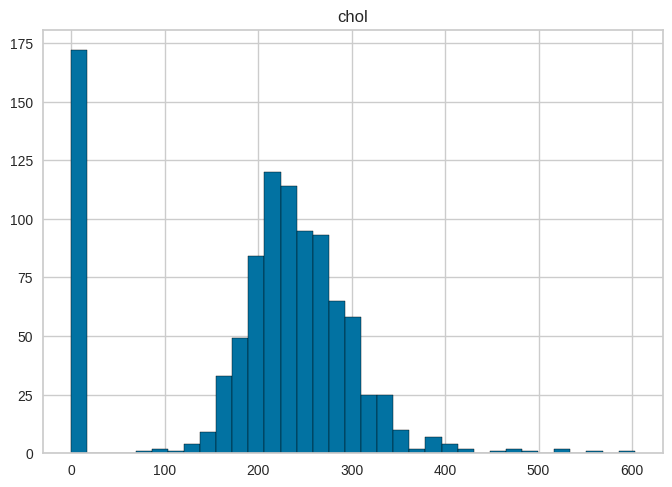

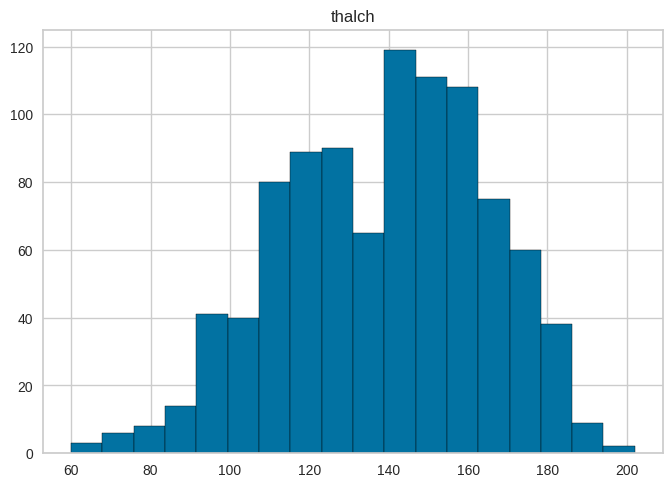

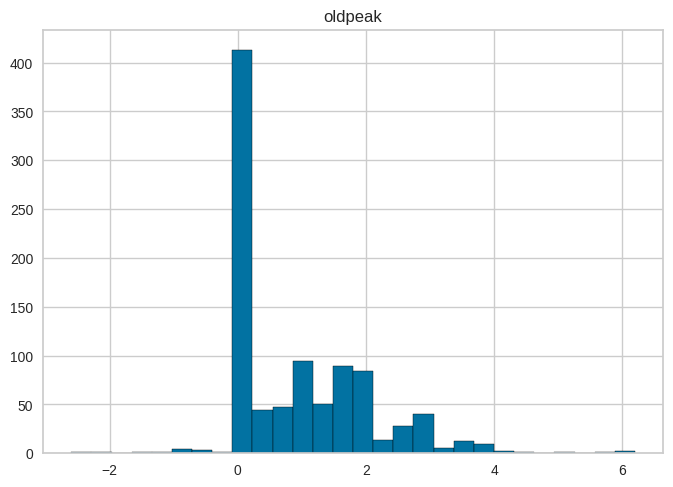

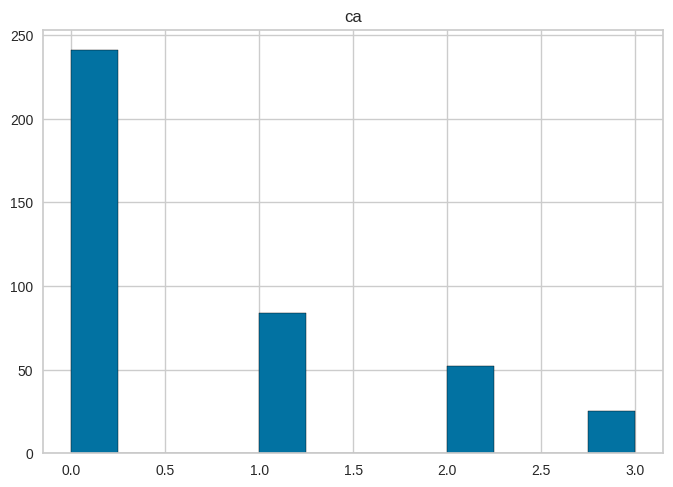

In [6]:
# visualisasi distribusi data numerik
num_col = ['age', 'trestbps','chol', 'thalch','oldpeak','ca']
for col in num_col:
    # membuat plot distribusi dari kolom numerik
    plt.hist(df[col], bins='auto', edgecolor='black')
    plt.title(col)
    plt.show()

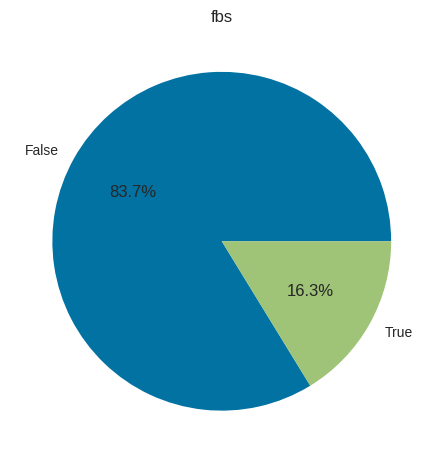

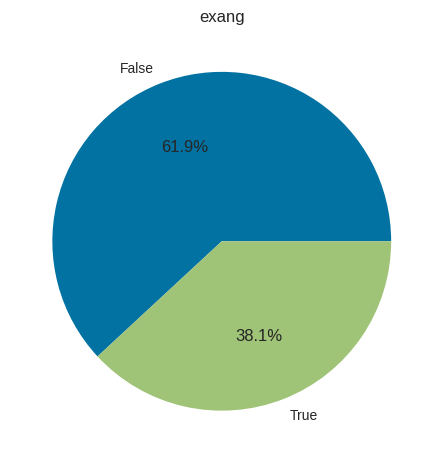

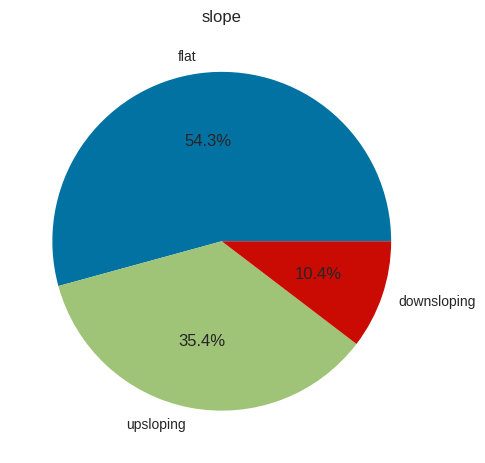

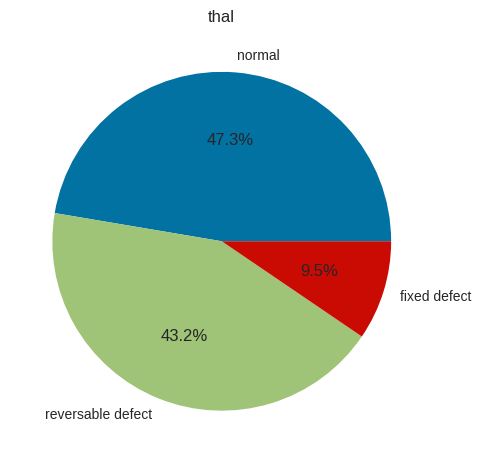

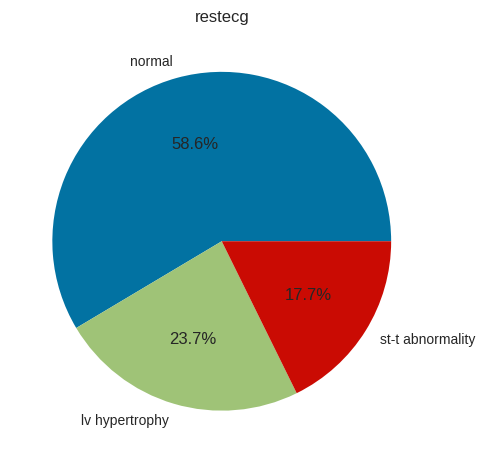

In [7]:
# visualisasi distribusi data kategori
cat_col = ['fbs','exang','slope','thal','restecg']
for col in cat_col:
    # membuat plot distribusi dari kolom kategori
    # menghitung nilai frekuensi dari setiap kolom
    catcol_counts = df[col].value_counts()

    # membuat distribusi dalam bentuk pie chart
    plt.pie(catcol_counts.values, labels=catcol_counts.index, autopct='%1.1f%%')
    plt.title(col)
    plt.show()

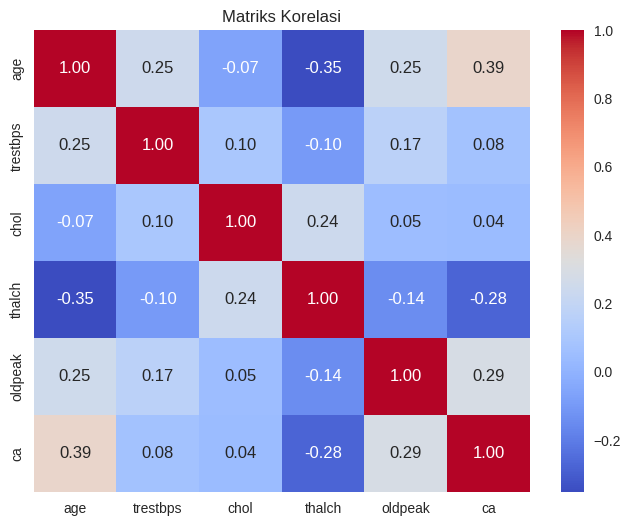

In [8]:
# Matriks Korelasi
correlation_matrix = df[num_col].corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [9]:
# df_proc digunakan sebagai dataframe untuk pre-processing
df_proc = df.copy()

In [10]:
# kolom exang & fbs memiliki nilai 'true' dan 'false' sehingga kita bisa isi kolom tersebut secara random untuk mengisi missing value
columns_to_impute = ['fbs', 'exang']

for column in columns_to_impute:
    # cek apakah kolom memiliki missing value
    if df_proc[column].isnull().any():
        missing_indices = df_proc[df_proc[column].isnull()].index
        # secara random akan mengisi missing value dengan "True" dan "False"
        random_values = np.random.choice([True, False], size=len(missing_indices))
        df_proc.loc[missing_indices, column] = random_values

In [11]:
# kolom "thal" dan "slope" mengandung data kategori yang mengandung banyak missing value sehingga kita perlu membuat kategori lain
columns_to_impute = ['slope', 'thal']

for column in columns_to_impute:
    # cek apakah kolom memiliki missing value
    if df_proc[column].isnull().any():
        # mengganti missing value dengan nilai "NotKnown"
        df_proc[column].fillna('NotKnown', inplace=True)

<ipython-input-11-9df6e931b0de>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_proc[column].fillna('NotKnown', inplace=True)


In [12]:
# kolom restecg hanya mengandung 2 missing values sehingga dapat diganti dengan mode dari kolom
col2impute = ['restecg']
mode = df_proc['restecg'].mode()[0]

for column in col2impute:
    # cek apakah kolom memiliki missing value
    if df_proc[column].isnull().any():
        # mengganti missing value dengan mode dari kolom "restecg"
        df_proc[column].fillna(mode, inplace=True)

<ipython-input-12-73381634f23e>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_proc[column].fillna(mode, inplace=True)


In [13]:
# kolom lainnya yang memiliki missing values yang harus diganti
cat_col_mean = ['trestbps','chol', 'thalch','oldpeak','ca']

for column in cat_col_mean:
    # cek apakah kolom memiliki missing value
    if df_proc[column].isnull().any():
        # hitung mean
        mean_value = df_proc[column].mean()
        # mengganti missing value dengan mean
        df_proc[column].fillna(mean_value, inplace=True)

<ipython-input-13-2ce5c710cca9>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_proc[column].fillna(mean_value, inplace=True)


In [14]:
# cek apakah data memiliki duplikasi pada data
total_duplicates = df_proc.duplicated().sum()
print(f"\nJumlah total duplikat: {total_duplicates}")


Jumlah total duplikat: 0


In [15]:
# drop kolom id karena tidak diperlukan dalam menemukan dalam analisis klastering
df_proc.drop(['id'], axis=1, inplace=True)
df_proc

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,51,Female,VA Long Beach,non-anginal,130.0,256.0,False,lv hypertrophy,149.0,False,0.5,upsloping,0.0,normal
1009,66,Male,VA Long Beach,asymptomatic,120.0,302.0,False,lv hypertrophy,151.0,False,0.4,flat,0.0,normal
1010,62,Female,VA Long Beach,asymptomatic,160.0,164.0,False,lv hypertrophy,145.0,False,6.2,downsloping,3.0,reversable defect
1011,62,Male,VA Long Beach,non-anginal,130.0,231.0,False,normal,146.0,False,1.8,flat,3.0,reversable defect


In [16]:
df_proc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1013 non-null   int64  
 1   sex       1013 non-null   object 
 2   dataset   1013 non-null   object 
 3   cp        1013 non-null   object 
 4   trestbps  1013 non-null   float64
 5   chol      1013 non-null   float64
 6   fbs       1013 non-null   object 
 7   restecg   1013 non-null   object 
 8   thalch    1013 non-null   float64
 9   exang     1013 non-null   object 
 10  oldpeak   1013 non-null   float64
 11  slope     1013 non-null   object 
 12  ca        1013 non-null   float64
 13  thal      1013 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 110.9+ KB


In [17]:
# df_proc2 digunakan untuk proses encoding pada pre-processing data
df_proc2 = df_proc.copy()

In [18]:
# melakukan encoding pada data kategori 'object' yang bersifat odinal menjadi data numerik
enc = OrdinalEncoder()

for col in df_proc2:
    if df_proc2[col].dtype == 'object':
        df_proc2[col] = df_proc2[col].astype(str)
        df_proc2[col] = enc.fit_transform(df_proc2[col].values.reshape(-1,1))

df_proc2

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,63,1.0,0.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,1.0,0.0,1.0
1,67,1.0,0.0,0.0,160.0,286.0,0.0,0.0,108.0,1.0,1.5,2.0,3.0,2.0
2,67,1.0,0.0,0.0,120.0,229.0,0.0,0.0,129.0,1.0,2.6,2.0,2.0,3.0
3,37,1.0,0.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,1.0,0.0,2.0
4,41,0.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,3.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,51,0.0,3.0,2.0,130.0,256.0,0.0,0.0,149.0,0.0,0.5,3.0,0.0,2.0
1009,66,1.0,3.0,0.0,120.0,302.0,0.0,0.0,151.0,0.0,0.4,2.0,0.0,2.0
1010,62,0.0,3.0,0.0,160.0,164.0,0.0,0.0,145.0,0.0,6.2,1.0,3.0,3.0
1011,62,1.0,3.0,2.0,130.0,231.0,0.0,1.0,146.0,0.0,1.8,2.0,3.0,3.0


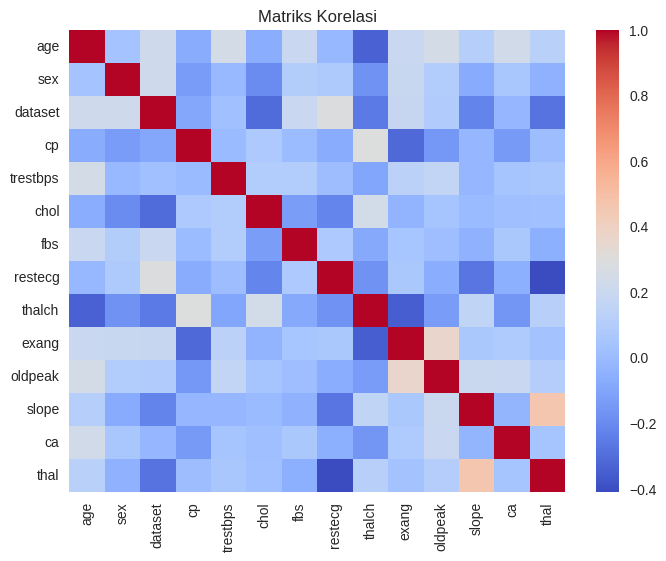

In [19]:
# matriks korelasi untuk melihat hubungan antar variabel setelah diencoding
correlation_matrix = df_proc2.corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [20]:
# Data Train
X = df_proc2.iloc[:, ].values
X

array([[63.,  1.,  0., ...,  1.,  0.,  1.],
       [67.,  1.,  0., ...,  2.,  3.,  2.],
       [67.,  1.,  0., ...,  2.,  2.,  3.],
       ...,
       [62.,  0.,  3., ...,  1.,  3.,  3.],
       [62.,  1.,  3., ...,  2.,  3.,  3.],
       [44.,  0.,  3., ...,  2.,  0.,  2.]])

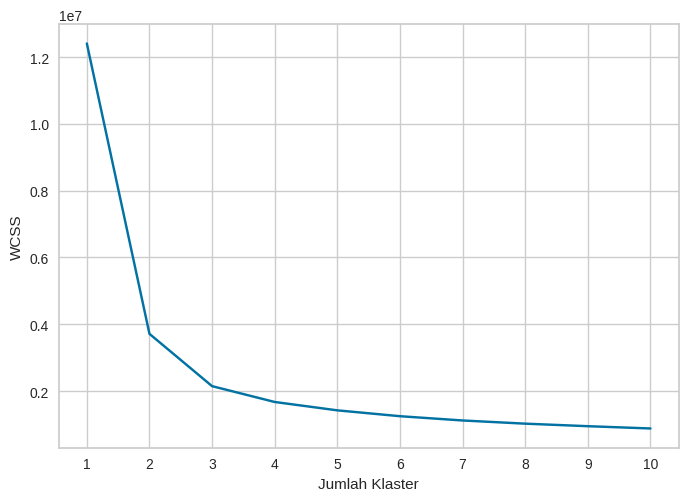

In [21]:
# inisialisasi paramter kmeans
kmeans_init = {
"init": "k-means++",
"n_init": 10,
"random_state": 42,
}

# Elbow Method
# buat list untuk menyimpan nilai WCSS untuk setiap k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_init)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# visualisasikan hasil
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel("Jumlah Klaster")
plt.ylabel("WCSS")
plt.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

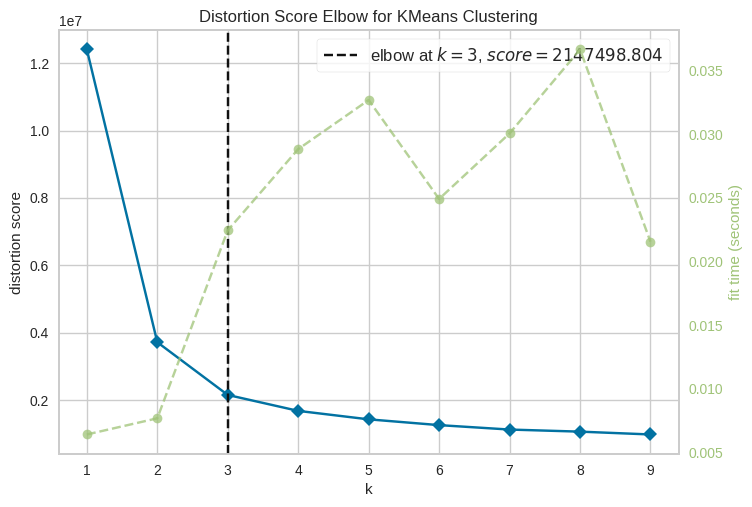

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
# Elbow Method dengan menggunakan KElbow Visualizer

# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [23]:
# Hitung Skor Siluet untuk jumlah klaster yang berbeda
for n_clusters in range(2, 11):
    kmeans_iterate =  KMeans(n_clusters = n_clusters, n_init=10)
    cluster_labels = kmeans_iterate.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"Jumlah Cluster = {n_clusters}, Silhouette Score = {silhouette_avg}")

Jumlah Cluster = 2, Silhouette Score = 0.7035356674750456
Jumlah Cluster = 3, Silhouette Score = 0.46892705440932997
Jumlah Cluster = 4, Silhouette Score = 0.416405166319016
Jumlah Cluster = 5, Silhouette Score = 0.3511911890125975
Jumlah Cluster = 6, Silhouette Score = 0.3488930187268038
Jumlah Cluster = 7, Silhouette Score = 0.34146529001335874
Jumlah Cluster = 8, Silhouette Score = 0.343052786818132
Jumlah Cluster = 9, Silhouette Score = 0.33174515402923305
Jumlah Cluster = 10, Silhouette Score = 0.25396844296428656


In [24]:
# inisiasi  k-means menggunakan jumlah klaster yang optimal
kmeans = KMeans(init="k-means++", n_clusters=2, n_init=10, random_state=42)

# latih algoritma k-means dengan data
kmeans.fit(X)

# hasil label dari klasterisasi dengan kmeans
labels = kmeans.labels_
df['Cluster'] = labels
df['Cluster']
df_proc['Cluster'] = labels
df_proc['Cluster']
df_proc2['Cluster'] = labels
df_proc2['Cluster']

,Cluster
0,0
1,0
2,0
3,0
4,0
...,...
1008,0
1009,0
1010,0
1011,0


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [25]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

(2, 14)


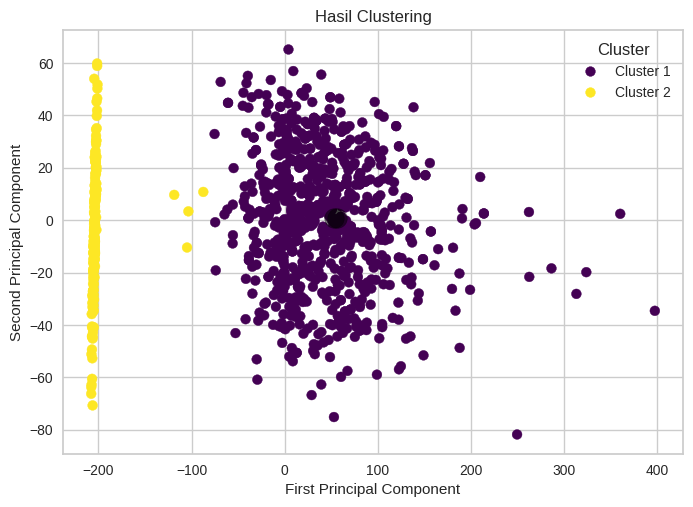

In [26]:
# Visualisasi Klaster pada data menggunakan 2D PCA projection
pca = PCA(2)

pca_data = pca.fit_transform(df_proc2)

x = pca_data[:,0]
y = pca_data[:,1]

scatter = plt.scatter(x, y, c=labels, s=50, cmap='viridis')
handles, _ = scatter.legend_elements()
plt.legend(handles=handles, title="Cluster", labels=[f'Cluster {i+1}' for i in df_proc2['Cluster'].unique()], loc="best")

centers = kmeans.cluster_centers_
print(centers.shape)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("Hasil Clustering")
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [27]:
# Data yang digunakan merupakan data yang telah melalui preprocessing dengan menangani missing value, tetapi data kategorikan tidak diencoding pada data ini.
df_proc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1013 non-null   int64  
 1   sex       1013 non-null   object 
 2   dataset   1013 non-null   object 
 3   cp        1013 non-null   object 
 4   trestbps  1013 non-null   float64
 5   chol      1013 non-null   float64
 6   fbs       1013 non-null   object 
 7   restecg   1013 non-null   object 
 8   thalch    1013 non-null   float64
 9   exang     1013 non-null   object 
 10  oldpeak   1013 non-null   float64
 11  slope     1013 non-null   object 
 12  ca        1013 non-null   float64
 13  thal      1013 non-null   object 
 14  Cluster   1013 non-null   int32  
dtypes: float64(5), int32(1), int64(1), object(8)
memory usage: 114.9+ KB


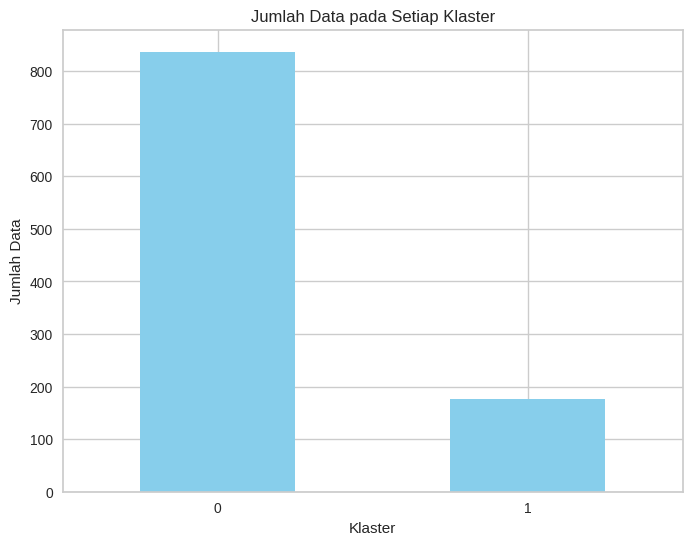

In [28]:
# Menghitung jumlah data dalam setiap klaster
cluster_counts = df_proc['Cluster'].value_counts().sort_index()

# Menampilkan hasil klastering dalam bentuk bar plot
plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Jumlah Data pada Setiap Klaster')
plt.xlabel('Klaster')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=0)
plt.show()

In [29]:
# kelompokpan fitur menjadi numerik dan kategorikal dengan klusternya
num_col_cluster = ['age', 'trestbps','chol', 'thalch','oldpeak','ca', 'Cluster']
cat_col_cluster = ['sex', 'dataset', 'cp', 'fbs','exang','slope','thal','restecg', 'Cluster']

In [30]:
# Analisis statistik deskriptif pada fitur numerik
cluster_summary_num = df_proc[num_col_cluster].groupby('Cluster').agg(['mean', 'std', 'median'])
print("Statistik Deskriptif Fitur Numerik Tiap Cluster:")
print(cluster_summary_num)

Statistik Deskriptif Fitur Numerik Tiap Cluster:
               age                     trestbps                          chol  \
              mean       std median        mean        std median        mean   
Cluster                                                                         
0        53.083632  9.385175   54.0  132.825675  17.019271  130.0  246.029172   
1        56.107955  8.633142   57.0  129.460990  22.895809  130.0    2.284091   

                               thalch                     oldpeak            \
               std median        mean        std median      mean       std   
Cluster                                                                       
0        56.417821  237.0  142.171434  24.003212  142.0  0.933246  1.073337   
1        15.117784    0.0  123.340897  24.201367  122.0  0.830863  1.032230   

                         ca                      
           median      mean       std    median  
Cluster                                          

In [31]:
# Analisis statistik deskriptif pada fitur kategorikal
cluster_summary_cat = df_proc[cat_col_cluster].groupby('Cluster').agg(
    sex_Mode = ('sex', lambda x: x.mode()[0]),
    dataset_Mode = ('dataset', lambda x: x.mode()[0]),
    cp_Mode = ('cp', lambda x: x.mode()[0]),
    fbs_Mode = ('fbs', lambda x: x.mode()[0]),
    exang_Mode = ('exang', lambda x: x.mode()[0]),
    slope_Mode = ('slope', lambda x: x.mode()[0]),
    thal_Mode = ('thal', lambda x: x.mode()[0]),
    restecg_Mode = ('restecg', lambda x: x.mode()[0])
)
print("Statistik Deskriptif Fitur Kategorikal Tiap Cluster:")
print(cluster_summary_cat)

Statistik Deskriptif Fitur Kategorikal Tiap Cluster:
        sex_Mode dataset_Mode       cp_Mode  fbs_Mode  exang_Mode slope_Mode  \
Cluster                                                                        
0           Male    Cleveland  asymptomatic     False       False       flat   
1           Male  Switzerland  asymptomatic     False       False       flat   

        thal_Mode restecg_Mode  
Cluster                         
0        NotKnown       normal  
1        NotKnown       normal  


In [32]:
# Menghitung nilai frekuensi dari setiap fitur kategori per klaster
frequencies = {}
for cluster, group in df_proc[cat_col_cluster].groupby('Cluster'):
    frequencies[cluster] = {
        'sex': group['sex'].value_counts().to_dict(),
        'dataset': group['dataset'].value_counts().to_dict(),
        'cp': group['cp'].value_counts().to_dict(),
        'fbs': group['fbs'].value_counts().to_dict(),
        'exang': group['exang'].value_counts().to_dict(),
        'slope': group['slope'].value_counts().to_dict(),
        'thal': group['thal'].value_counts().to_dict(),
        'restecg': group['restecg'].value_counts().to_dict()
    }

# Menampilkan hasil
for cluster, freq in frequencies.items():
    print(f"Cluster {cluster + 1}:")
    for feature, counts in freq.items():
        print(f"Jumlah nilai {feature}: {counts}")

Cluster 1:
Jumlah nilai sex: {'Male': 627, 'Female': 210}
Jumlah nilai dataset: {'Cleveland': 304, 'Hungary': 290, 'VA Long Beach': 243}
Jumlah nilai cp: {'asymptomatic': 408, 'non-anginal': 204, 'atypical angina': 178, 'typical angina': 47}
Jumlah nilai fbs: {False: 698, True: 139}
Jumlah nilai exang: {False: 525, True: 312}
Jumlah nilai slope: {'flat': 303, 'NotKnown': 271, 'upsloping': 210, 'downsloping': 53}
Jumlah nilai thal: {'NotKnown': 393, 'normal': 229, 'reversable defect': 176, 'fixed defect': 39}
Jumlah nilai restecg: {'normal': 483, 'lv hypertrophy': 228, 'st-t abnormality': 126}
Cluster 2:
Jumlah nilai sex: {'Male': 165, 'Female': 11}
Jumlah nilai dataset: {'Switzerland': 123, 'VA Long Beach': 50, 'Hungary': 3}
Jumlah nilai cp: {'asymptomatic': 129, 'non-anginal': 34, 'atypical angina': 8, 'typical angina': 5}
Jumlah nilai fbs: {False: 114, True: 62}
Jumlah nilai exang: {False: 90, True: 86}
Jumlah nilai slope: {'flat': 79, 'upsloping': 39, 'NotKnown': 38, 'downsloping': 

In [33]:
# Fungsi untuk menampilkan visualisasi distribusi fitur numerik per cluster
def plot_numeric_distribution(df, numeric_features, cluster_col):
    """
      Tujuan : Menampilkan visualisasi distribusi fitur numerik per cluster.

      Parameters:
        df : data frame yang telah melewati proses pre-processing. Namun tidak melalui proses encoding.
        numeric_features : kolom numerik pada dataframe
        cluster_col : kolom berisi klaster

      Returns:
        None
    """
    for feature in numeric_features:
        plt.figure(figsize=(10, 6))
        sns.histplot(data=df, x=feature, hue=cluster_col, kde=True, palette='Set2', bins=10)
        plt.title(f'Distribusi {feature} per Cluster', fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('Frekuensi', fontsize=12)
        plt.legend(title='Cluster', labels=[f'Cluster {i+1}' for i in df[cluster_col].unique()])
        plt.show()

# Fungsi untuk menampilkan distribusi fitur kategori per cluster
def plot_categorical_distribution(df, categorical_features, cluster_col):
    """
      Tujuan : Menampilkan visualisasi distribusi fitur kategori per cluster.

      Parameters:
        df : data frame yang telah melewati proses pre-processing. Namun tidak melalui proses encoding.
        categorical_features : kolom kategorik pada dataframe
        cluster_col : kolom berisi klaster

      Returns:
        None
    """
    for feature in categorical_features:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=feature, hue=cluster_col, palette='Set3')
        plt.title(f'Distribusi {feature} per Cluster', fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('Frekuensi', fontsize=12)
        plt.legend(title='Cluster', labels=[f'Cluster {i+1}' for i in df[cluster_col].unique()])
        plt.show()

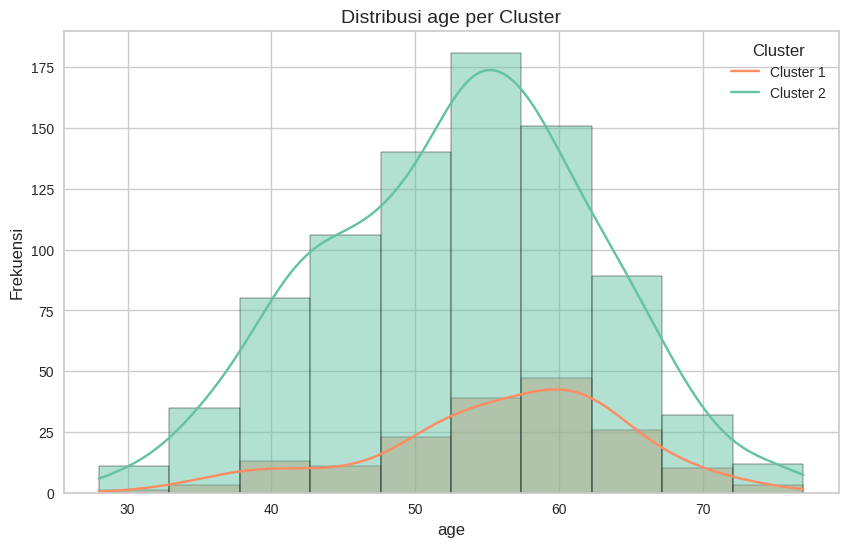

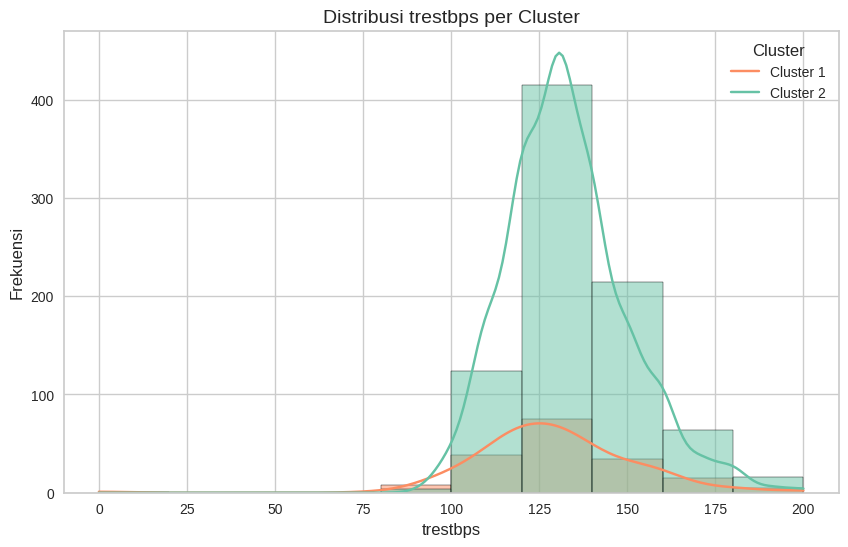

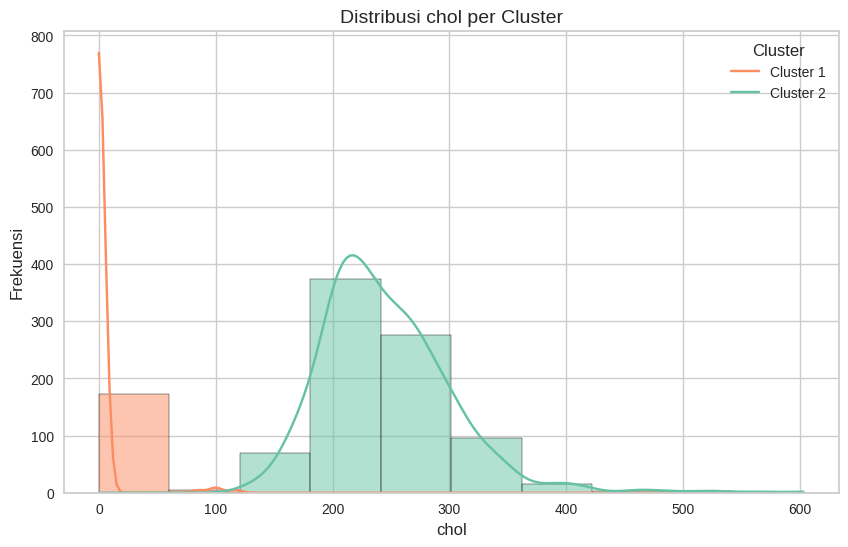

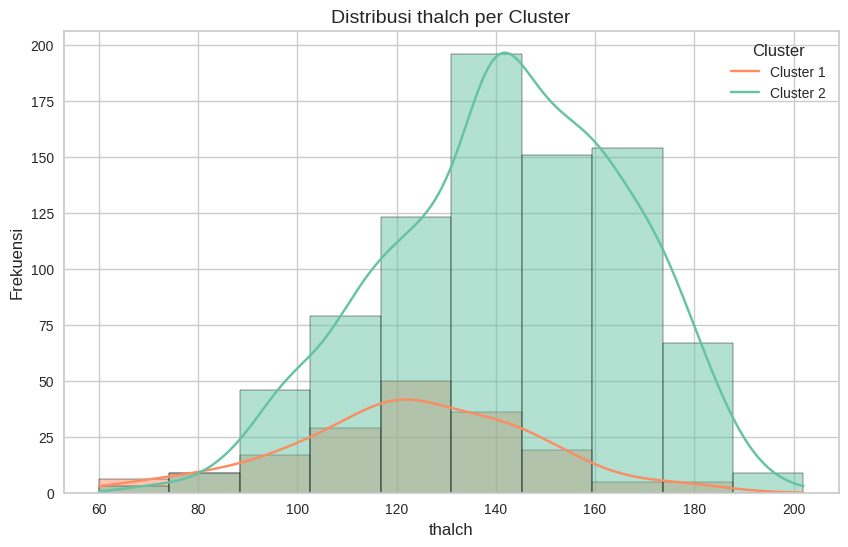

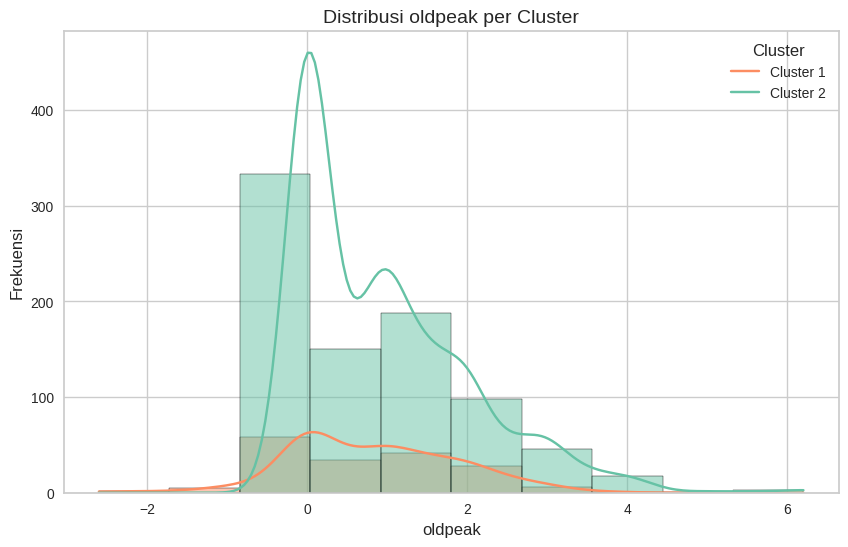

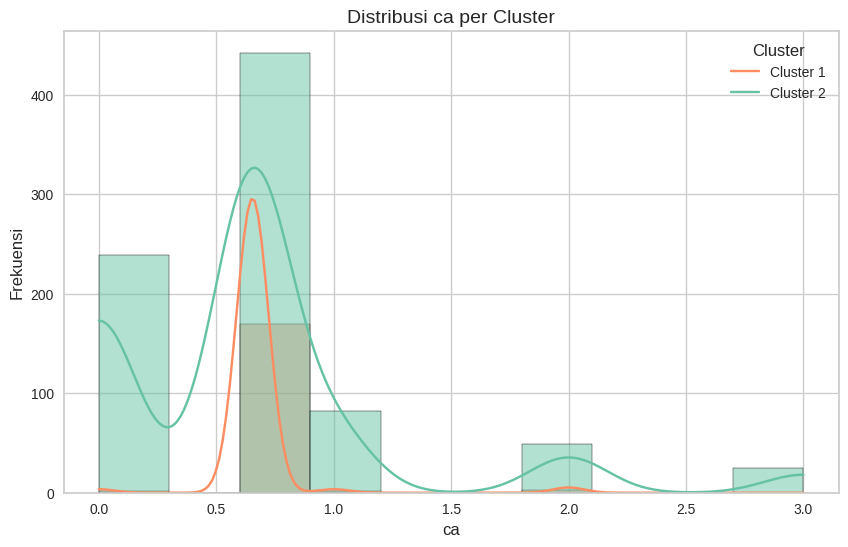

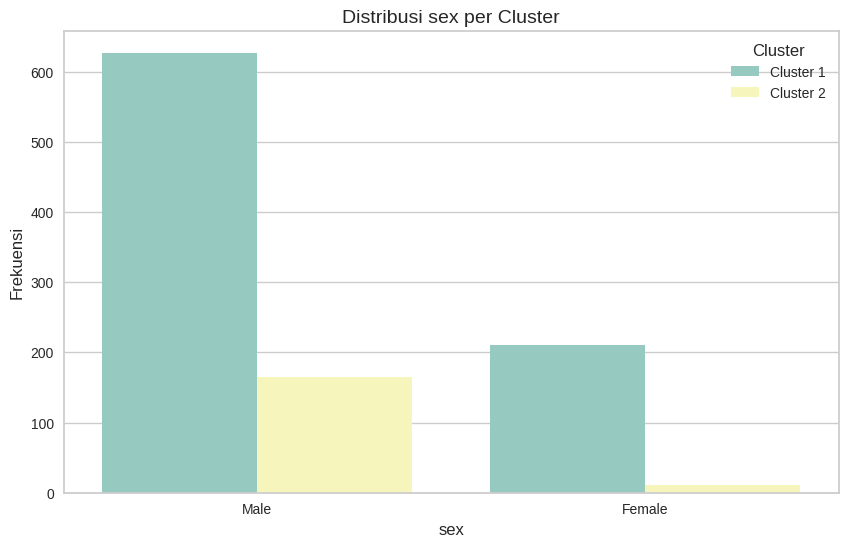

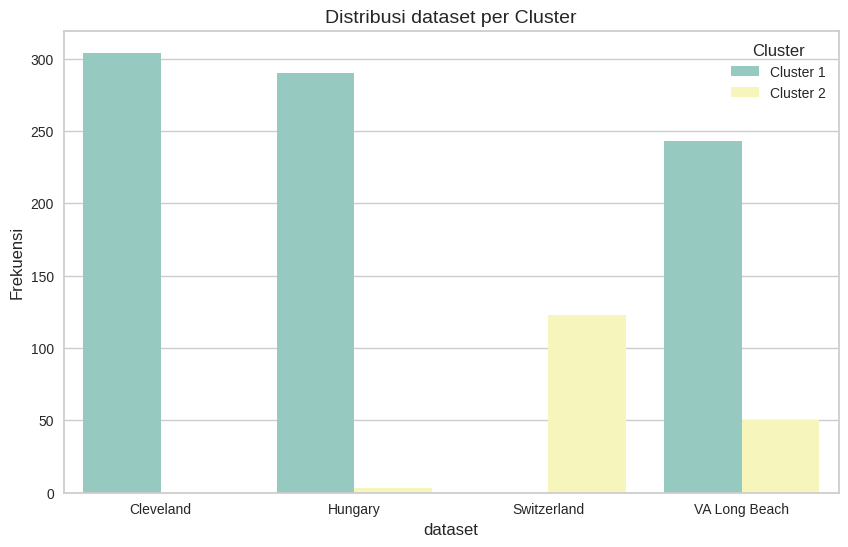

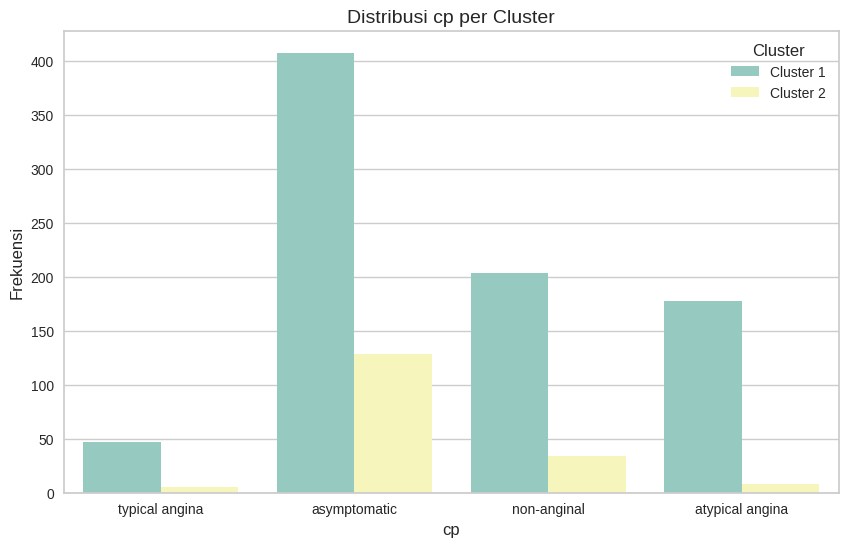

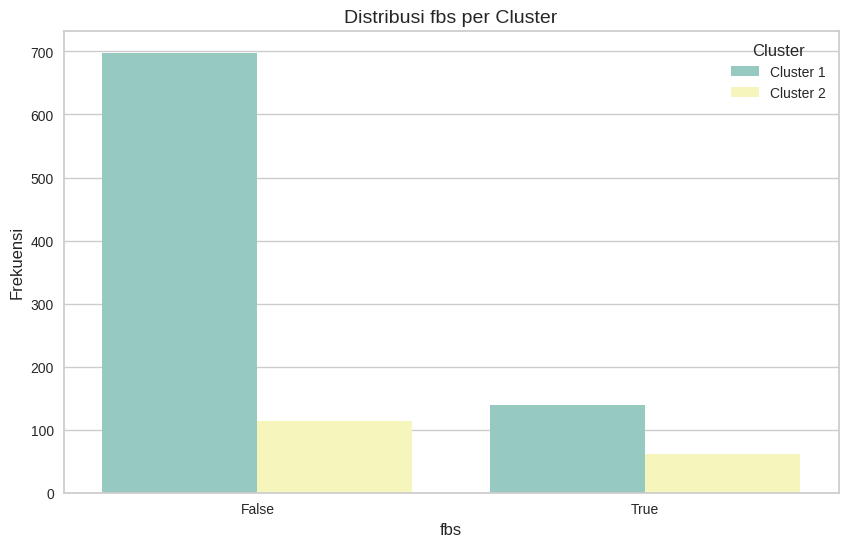

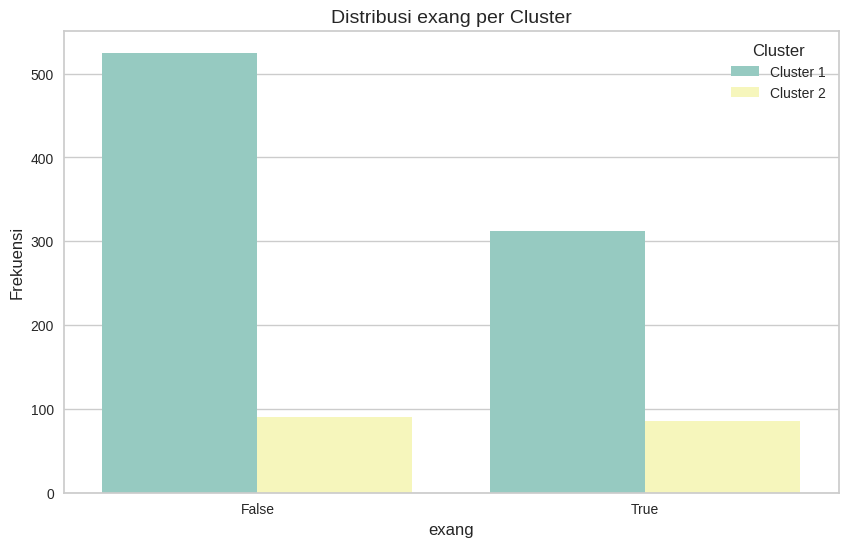

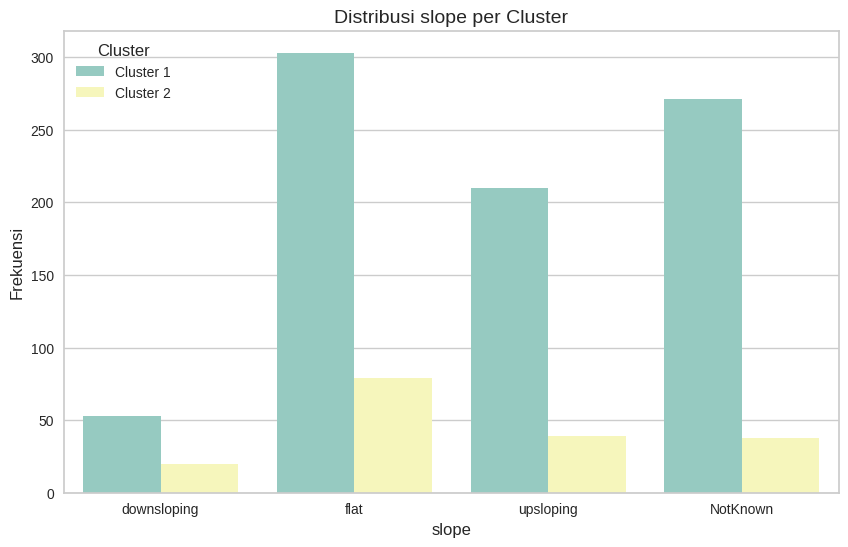

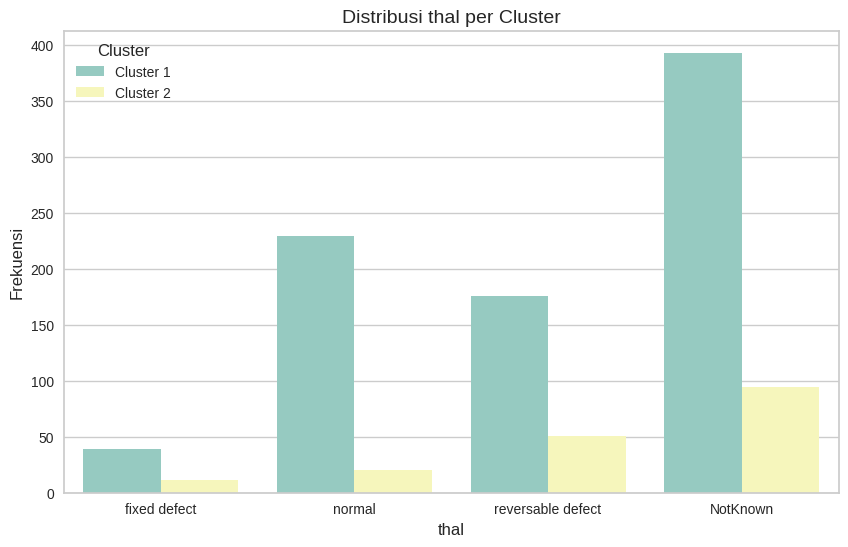

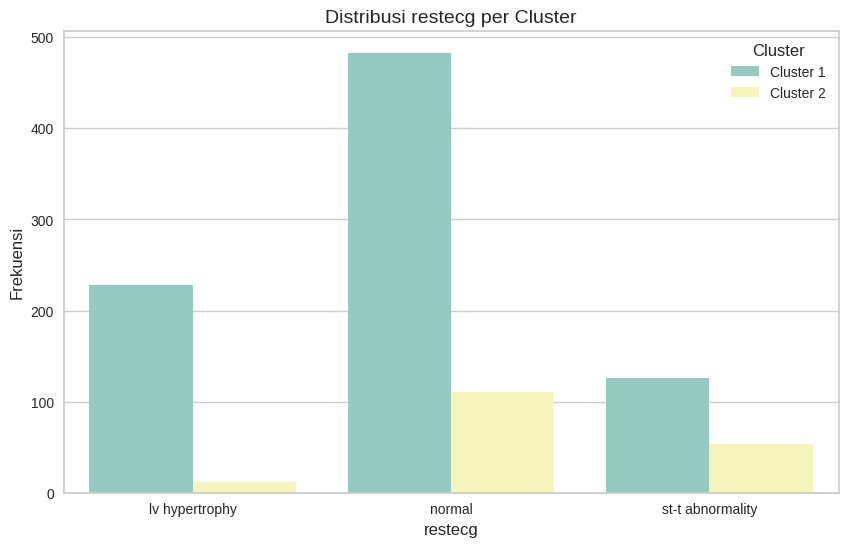

In [34]:
# pisahkan kolom numerik dan kategorikal
num_col = ['age', 'trestbps','chol', 'thalch','oldpeak','ca']
cat_col = ['sex', 'dataset', 'cp', 'fbs','exang','slope','thal','restecg']

# Hasil visualisasi dengan memanggil fungsi di atas
plot_numeric_distribution(df_proc, num_col, 'Cluster')
plot_categorical_distribution(df_proc, cat_col, 'Cluster')

Tulis hasil interpretasinya di sini.
1. Cluster 1:

    a. Atribut Numerik:
       - age (28 - 77): Usia
         - rata-rata : 53.08
         - standar deviasi : 9.38
         - median : 54
       - trestbps (0 - 200): tekanan darah saat istirahat (mmHg)
         - rata-rata : 132.83
         - standar deviasi : 17.02
         - median : 130
       - chol (0 - 603): kadar kolesterol (mg/dl)
         - rata-rata : 246.03
         - standar deviasi : 56.42
         - median : 237
       - thalch (60 - 202): detak jantung maksimum yang dicapai
         - rata-rata : 142.17
         - standar deviasi : 24.00
         - median : 142
       - oldpeak (-2.6 - 6.2): Depresi ST yang disebabkan oleh olahraga relatif terhadap istirahat
         - rata-rata : 0.93
         - standar deviasi : 1.07
         - median : 0.8
       - ca (0 - 3): jumlah pembuluh darah utama
         - rata-rata : 0.65
         - standar deviasi : 0.64
         - median : 0.65
    b. Atribut Kategorik:
       - sex (): Gender
         - modus : Male
         - frekuensi :
           - Male : 627
           - Female : 210
       - dataset (): asal usul data yang diperoleh
         - modus : Cleveland
         - frekuensi :
           - Cleveland : 304
           - Hungary : 290
           - VA Long Beach : 243
       - cp (): tipe nyeri dada pada pasien
         - modus : asymptomatic
         - frekuensi :
           - asymptomatic : 400
           - non-anginal : 204
           - atypical angina : 178
           - typical angine : 47
       - fbs (): kadar gula darah saat fasting (>120 mg/dl ?)
         - modus : False
         - frekuensi :
           - False : 701
           - True : 136
       - exang (): angina pasien terinduksi saat olahraga (True atau False)
         - modus : False
         - frekuensi :
           - False : 526
           - True : 311
       - slope (): Grafik kemiringan segmen ST saat pada puncak olahraga
         - modus : flat
         - frekuensi :
           - flat : 303
           - NotKnown : 271
           - upsloping : 210
           - downsloping : 53
       - thal (): kelainan darah atau thalassemia
         - modus : NotKnown
         - frekuensi :
           - NotKnown : 393
           - normal : 229
           - reversable defect : 176
           - fixed defect : 39
       - restecg (): hasil elektrokardiografi saat istirahat
         - modus : normal
         - frekuensi :
           - normal : 483
           - hyperstropy : 228
           - ss-t abnormality : 126
    **Analisis** : Cluster ini memiliki perbedaan yang cukup mencolok dengan cluster 2, yaitu kadar kolesterol yang selisih rata-rata antara Cluster 1 dan Cluster 2 cukup jauh. Pada Cluster ini rata-rata kadar kolesterol yaitu 246.03 mg/dl. Kemudian dengan kadar kolesterol yang cukup tinggi, diketahui detak jantung maksimal yang dihasilkan rata-rata mencapai 142.17. Selain, itu dataset ini didominasi dari rumah sakit Cleveland. Untuk fitur lainnya, pada cluster ini, nilai rata-rata dan modusnya tidak jauh berbeda dengan nilai rata-rata dan modus fitur pada Cluster 2.
2. Cluster 2:

    a. Atribut Numerik:
       - age (28 - 77): Usia
         - rata-rata : 56.10
         - standar deviasi : 8.63
         - median : 57
       - trestbps (0 - 200): tekanan darah saat istirahat (mmHg)
         - rata-rata : 129.46
         - standar deviasi : 22.90
         - median : 130
       - chol (0 - 603): kadar kolesterol (mg/dl)
         - rata-rata : 2.28
         - standar deviasi : 15.12
         - median : 0
       - thalch (60 - 202): detak jantung maksimum yang dicapai
         - rata-rata : 123.34
         - standar deviasi : 24.20
         - median : 122
       - oldpeak (-2.6 - 6.2): Depresi ST yang disebabkan oleh olahraga relatif terhadap istirahat
         - rata-rata : 0.83
         - standar deviasi : 1.03
         - median : 0.91
       - ca (0 - 3): jumlah pembuluh darah utama
         - rata-rata : 0.67
         - standar deviasi : 0.19
         - median : 0.65
    b. Atribut Kategorik:
       - sex (): Gender
         - modus : Male
         - frekuensi :
           - Male : 165
           - Female : 11
       - dataset (): asal usul data yang diperoleh
         - modus : Switzerland
         - frekuensi :
           - Switzerland : 123
           - Hungary : 3
           - VA Long Beach : 50
       - cp (): tipe nyeri dada pada pasien
         - modus : asymptomatic
         - frekuensi :
           - asymptomatic : 129
           - non-anginal : 34
           - atypical angina : 8
           - typical angine : 5
       - fbs (): kadar gula darah saat fasting (>120 mg/dl ?)
         - modus : False
         - frekuensi :
           - False : 109
           - True : 67
       - exang (): angina pasien terinduksi saat olahraga (True atau False)
         - modus : False
         - frekuensi :
           - False : 91
           - True : 85
       - slope (): Grafik kemiringan segmen ST saat pada puncak olahraga
         - modus : flat
         - frekuensi :
           - flat : 79
           - NotKnown : 38
           - upsloping : 39
           - downsloping : 20
       - thal (): kelainan darah atau thalassemia
         - modus : NotKnown
         - frekuensi :
           - NotKnown : 94
           - normal : 20
           - reversable defect : 51
           - fixed defect : 11
       - restecg (): hasil elektrokardiografi saat istirahat
         - modus : normal
         - frekuensi :
           - normal : 111
           - hyperstropy : 12
           - ss-t abnormality : 53
    **Analisis** : Cluster ini memiliki perbedaan yang cukup mencolok dengan cluster 1, yaitu kadar kolesterol yang selisih rata-rata antara Cluster 2 dan Cluster 1 cukup jauh. Pada Cluster ini rata-rata kadar kolesterol yaitu 2.28 mg/dl. Kemudian dengan kadar kolesterol yang sangat rendah, diketahui detak jantung maksimal yang dihasilkan rata-rata mencapai 123.34. Selain, itu dataset ini didominasi dari rumah sakit Switzerland. Untuk fitur lainnya, pada cluster ini, nilai rata-rata dan modusnya tidak jauh berbeda dengan nilai rata-rata dan modus fitur pada Cluster 1.

**Kesimpulan** : Fokus dari klasterisasi dataset ini adalah memeriksa pasien anonim yang telah menerima diagnosis penyakit jantung. Dengan mengidentifikasi pasien yang memiliki karakteristik yang sama, diharapkan dapat memperoleh wawasan tentang efektivitas pengobatan tertentu. Sehingga hasil klasterisasi yang dihasilkan oleh model K-MEANS, diketahui faktor/fitur/atribut yang paling membedakan antara klaster 1 dan klaster 2 adalah tingkat kadar kolesterol dan denyut jantung maksimal pada pasien. Sehingga dokter bisa menentukan langkah pertama yang perlu dilakukan pada pasien yang telah terdiagnosa penyakit jantung.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [35]:
df_proc2.to_csv('heart_disease_final.csv', index=False)